## **PROJECT BACKGROUND**

With the advent of technology and the internet, there are more opportunities for businesses to reach a wider audience than any physical medium has achieved in the past. However, this also brings new challenges in assessing how well these advertisements perform on a larger scale. The click-through rate is a useful gauge and measurement to evaluate the success of an online campaign for a particular website, product, or service. This project aims to determine which features we should focus on to improve the performance of our advertisements. It seeks to answer fundamental questions about what factors affect the success of an advertisement.


## **OBJECTIVE**


*   Develop a model that can predict if a user will click-through an advertisement or not
*   Utilize the model's result as a catalyst for businesses to make data driven decisions on their advertisement campaigns





## **IMPORT LIBRARIES**

In [ ]:
%pip install mljar-scikit-plot
%pip install dalex
%pip install shap
%pip install eli5
%pip install jupyter

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import sklearn.metrics as metrics
import scikitplot as skplt

import dalex as dx
import shap

from sklearn.metrics import (r2_score,mean_absolute_error,mean_squared_error)
from sklearn.model_selection import train_test_split, GridSearchCV

# FUNCTIONS

## Categorize Timestamp

In [ ]:
def categorize_day(timestamp):
    if timestamp.weekday() < 5:
        return 'Weekday'
    else:
        return 'Weekend'

## Label Encode

In [ ]:
le = LabelEncoder()
def label_encode(data):
  for i in text_data_features :
    data[i] = le.fit_transform(data[i])
    print(i,' : ',data[i].unique(),' = ',le.inverse_transform(data[i].unique()))
  return data

## Box Plot

In [ ]:
def create_box_plot(data, x_col, color_col, title, color_map=None):
    fig = px.box(data,
                 x=x_col,
                 color=color_col,
                 title=title,
                 color_discrete_map=color_map)
    fig.update_traces(quartilemethod="exclusive")
    fig.show()

## Histogram

In [ ]:
def create_hist(data, x_col, color_col, title, color_map=None):
  fig = px.histogram(data, x=x_col, color=color_col, title=title, color_discrete_map=color_map, text_auto=True)
  fig.update_traces(marker_line_width=1,marker_line_color="white")

  fig.show()

# PREPROCESSING

## Load Dataset

In [ ]:
df = pd.read_csv("ctr.csv")
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1
...,...,...,...,...,...,...,...,...,...,...
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1


In [ ]:
#Continents data
continents_df = pd.read_csv("continents.csv")

df_merged = pd.merge(df, continents_df, on='Country', how='left')
df_merged.fillna("Continental shelf", inplace=True)
df = df_merged
continents_df

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
191,South America,Paraguay
192,South America,Peru
193,South America,Suriname
194,South America,Uruguay


## Data Information

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
 10  Continent                 10000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 859.5+ KB


In [ ]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Continent
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0,Continental shelf
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0,Asia
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0,Continental shelf
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0,Africa
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1,Asia


## Remove Null and Duplicate

In [ ]:
df.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Gender,0
Country,0
Timestamp,0
Clicked on Ad,0


In [ ]:
df.duplicated().sum()

215

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,9785.000000,9785.000000,9785.000000,9785.000000,9785.000000
mean,61.601379,35.839550,53948.143348,177.886144,0.488605
std,15.698216,8.538524,13360.051625,40.861875,0.499896
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.030000,29.000000,44174.250000,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.270000,41.000000,62669.590000,212.870000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [ ]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Ad Topic Line
['Decentralized real-time circuit' 'Optional full-range projection'
 'Total 5thgeneration standardization' 'Balanced empowering success'
 'Focused multi-state workforce' 'Optimized upward-trending productivity'
 'Programmable uniform website' 'Customizable tangible hierarchy'
 'Function-based incremental standardization'
 'Digitized content-based circuit'
 'Team-oriented transitional methodology'
 'Configurable disintermediate throughput' 'Intuitive radical forecast'
 'Front-line bandwidth-monitored capacity'
 'Inverse zero-defect capability' 'Intuitive exuding service-desk'
 'User-friendly client-server instruction set'
 'Synergized clear-thinking protocol' 'Configurable tertiary capability'
 'Secured 24hour policy' 'Total directional approach'
 'Extended context-sensitive monitoring'
 'De-engineered attitude-oriented projection'
 'Proactive context-sensitive project' 'Automated mobile model'
 'Synchronized multi-tasking ability'
 'Centralized logistical secured line'
 '

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9785 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  9785 non-null   float64
 1   Age                       9785 non-null   float64
 2   Area Income               9785 non-null   float64
 3   Daily Internet Usage      9785 non-null   float64
 4   Ad Topic Line             9785 non-null   object 
 5   City                      9785 non-null   object 
 6   Gender                    9785 non-null   object 
 7   Country                   9785 non-null   object 
 8   Timestamp                 9785 non-null   object 
 9   Clicked on Ad             9785 non-null   int64  
 10  Continent                 9785 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 917.3+ KB


## Exploratory Data Analysis

### **Click Distribution**

Clicked on ad graph representation :

0 - Not clicked ad

1 - Clicked ad

Graph shows that not clicked are more than those who clicked the ad.

In [ ]:
ads = df['Clicked on Ad'].value_counts()

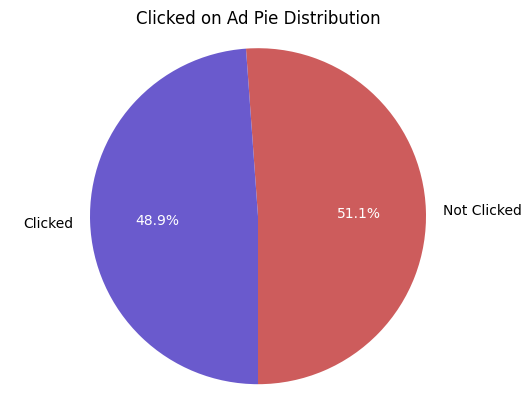

In [ ]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    ads,
    labels=["Not Clicked", "Clicked"],
    colors=['IndianRed', "SlateBlue"],
    autopct='%1.1f%%',
    startangle=270
)

for text in autotexts:
    text.set_color('white')
    text.set_fontsize(10)

ax.axis('equal')

plt.title('Clicked on Ad Pie Distribution')
plt.show()

The number of people who did not click on the ad is slightly higher than those who did click on it. This indicates that a greater proportion of users did not engage with the ad.

### **Time Spent on Site**

In [ ]:
create_box_plot(df, "Daily Time Spent on Site", "Clicked on Ad", "Click Through Rate based on Time Spent on Site", {1: 'blue', 0: 'red'})

On average, more people have clicked on ad the higher they have spent on site

### **Daily Internet Usage**

In [ ]:
create_hist(df, "Daily Internet Usage", "Clicked on Ad", "Click Through Rate based on Daily Internet Usage", {1: 'SlateBlue', 0: 'IndianRed'})

In [ ]:
create_box_plot(df, "Daily Internet Usage", "Clicked on Ad", "Click Through Rate based on Daily Internet Usage", {1: 'blue', 0: 'red'})

People who have less daily ineternet usage has a higher likeliness to click through an ad

### **User Age**

In [ ]:
create_hist(df, "Age", "Clicked on Ad", "Click Through Rate based on Age", {1: 'SlateBlue', 0: 'IndianRed'})


In [ ]:
create_box_plot(df, "Age", "Clicked on Ad", "Click Through Rate based on Age", {1: 'blue', 0: 'red'})

Older people tend to click through the ads

### **Gender**

In [ ]:
Gender = df['Gender'].value_counts()

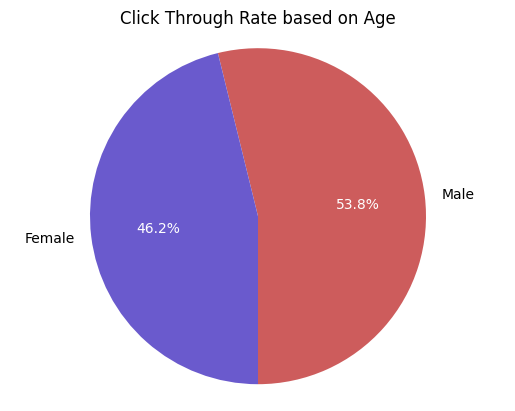

In [ ]:
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    Gender,
    labels=["Male", "Female"],
    colors=['IndianRed', "SlateBlue"],
    autopct='%1.1f%%',
    startangle=270
)

for text in autotexts:
    text.set_color('white')
    text.set_fontsize(10)

ax.axis('equal')

plt.title('Click Through Rate based on Age')
plt.show()

### Area Income

In [ ]:
create_box_plot(df, "Area Income", "Clicked on Ad", "Click Through Rate based on Area Income", {1: 'blue', 0: 'red'})


Less income demographics also tend to interact with the ads

### Country

In [ ]:
df1 = df.copy()

country_count = df1.groupby(['Country', 'Continent'])['Clicked on Ad'].value_counts().unstack(fill_value=0)

country_count.columns = ['count_0', 'count_1']

country_count = country_count.reset_index()

country_count.sort_values(by='count_1', ascending=False, inplace=True)


##Limit head to 20 to visualize the graph
fig = px.bar(country_count.head(20), x='Country', y=['count_0', 'count_1'], text_auto=True, color_discrete_map={'count_0': 'IndianRed', 'count_1': 'SlateBlue'})
fig.update_traces(marker_line_width=1,marker_line_color="white")

fig.show()
country_count


,Country,Continent,count_0,count_1
9,Australia,Oceania,63,283
44,Czech Republic,Continental shelf,53,272
187,Turkey,Europe,26,270
14,Bangladesh,Asia,7,177
118,Micronesia,Oceania,7,152
...,...,...,...,...
177,Syrian Arab Republic,Continental shelf,2,0
174,Svalbard & Jan Mayen Islands,Continental shelf,6,0
171,Spain,Europe,44,0
67,Gibraltar,Continental shelf,16,0


In [ ]:
df2 = df.copy()

# Group by 'Country' and count occurrences of 0s and 1s of Clicked on Ad
country = df2.groupby(['Country', 'Continent', 'Clicked on Ad']).size().unstack(fill_value=0)

country['Total'] = country.sum(axis=1)

country.columns = ['Not Clicked', 'Clicked', 'Total']
country = country.reset_index()

country['Percent Clicked'] = (country['Clicked'] / country['Total'] * 100).round(2)
country['Percent NotClicked'] = (country['Not Clicked'] / country['Total'] * 100).round(2)

country.sort_values(by='Clicked', ascending=False, inplace=True)

fig = px.bar(country.head(20), x='Country', y='Clicked', text='Percent Clicked')
fig.update_traces(marker_line_width=1,marker_line_color="white", marker_color="SlateBlue")

fig.show()
country.head(20)

,Country,Continent,Not Clicked,Clicked,Total,Percent Clicked,Percent NotClicked
9,Australia,Oceania,63,283,346,81.79,18.21
44,Czech Republic,Continental shelf,53,272,325,83.69,16.31
187,Turkey,Europe,26,270,296,91.22,8.78
14,Bangladesh,Asia,7,177,184,96.20,3.80
118,Micronesia,Oceania,7,152,159,95.60,4.40
191,Uganda,Africa,7,126,133,94.74,5.26
203,Western Sahara,Continental shelf,5,125,130,96.15,3.85
136,Northern Mariana Islands,Continental shelf,6,116,122,95.08,4.92
128,Netherlands,Europe,4,115,119,96.64,3.36
49,El Salvador,North America,11,106,117,90.60,9.40


In [ ]:
continent = country.groupby('Continent')[['Clicked', 'Not Clicked']].sum()
continent['Total'] = continent.sum(axis=1)

continent['Percent Clicked'] = (continent['Clicked'] / continent['Total'] * 100).round(2)
continent['Percent NotClicked'] = (continent['Not Clicked'] / continent['Total'] * 100).round(2)

continent.sort_values(by='Percent Clicked', ascending=False, inplace=True)

continent

,Clicked,Not Clicked,Total,Percent Clicked,Percent NotClicked
Continent,,,,,
Oceania,627,257,884,70.93,29.07
North America,465,219,684,67.98,32.02
Europe,1343,1048,2391,56.17,43.83
Continental shelf,976,882,1858,52.53,47.47
Asia,598,993,1591,37.59,62.41
South America,127,237,364,34.89,65.11
Africa,645,1368,2013,32.04,67.96


<Axes: xlabel='Continent'>

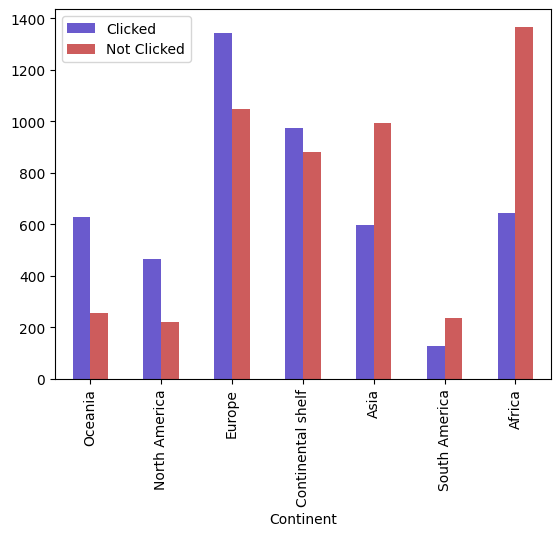

In [ ]:
cplot = continent[['Clicked', 'Not Clicked']]
cplot.plot(kind = 'bar', color=['SlateBlue', 'IndianRed'])

### Timestamp

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day Category'] = df['Timestamp'].apply(categorize_day)
df['Day Category']

,Day Category
0,Weekday
1,Weekend
2,Weekday
3,Weekday
4,Weekday
...,...
9994,Weekend
9995,Weekend
9996,Weekend
9997,Weekday


In [ ]:
day_cat = df.groupby(['Day Category', 'Clicked on Ad']).size().unstack(fill_value=0)
day_cat.columns = ['Not_Clicked', 'Clicked']

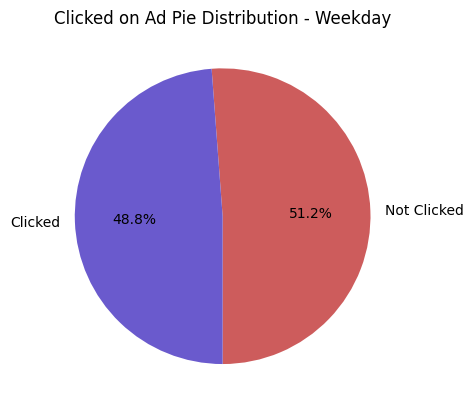

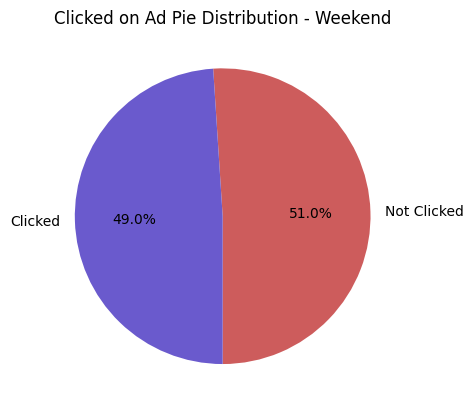

In [ ]:
for index, row in day_cat.iterrows():
    data = [row['Not_Clicked'], row['Clicked']]
    fig, ax = plt.subplots()
    plt.title('Clicked on Ad Pie Distribution - '+index)
    wedges, texts, autotexts = ax.pie(data, labels=['Not Clicked', 'Clicked'], autopct='%1.1f%%', startangle=270, colors=['IndianRed', "SlateBlue"],)


# MODELLING

## Label Encoding

We remove Clicked on ad and Timestamp from the features on X. and Predict clicked on ad on Y

In [ ]:
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

df = label_encode(df)
df


Ad Topic Line  :  [ 96 301 484  24 157 300 363  82 182 101 482  52 224 164 230 222 530 470
  59 426 489 143  85 344  19 459  40  32 242 302 180 367 281 350  48  47
  93 332 421 548 450 295 411  35 171   5 541  45  20 152 265  65 437  70
 153 122  33 322 119  60 462 241  54 275 226 342  38 335 488 327 212 525
   7 268 546 249 175 422  76 513 388 343 447 328 349  15 468 481 161 256
  80  17 190 168 219 397  56 496 260 508 360 471  98 545 553 264 352 511
 147 449 220 151 334 532 311 529 167   1 133 233  79 368 140 319 331 390
 134 292 531 556 266 483 248 408 510 307 149 106 199 554 467  90 323 423
 355 410 304 227  91 127 418  21 192 537 318 321 438 441 144 201 517  25
 221  83  64 506 535 497 110  44 501 463 169 165 419 298 396 170 420 413
 326 475 472 109  74 524 115 509 440 278 145 398 215 274  73 309  29 324
 385 102  36 403 372 218 391 253 429 290 433 128  97 178  11 543 207 177
  22 184 495  53 214 474 540  34 469 263 130 234 158 186  37 139 254 528
 202 407  84 273 348 376 188 359 

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,Continent,Day Category
0,62.26,32.0,69481.85,172.83,96,234,1,174,2016-06-09 21:43:05,0,2,0
1,41.73,31.0,61840.26,207.17,301,460,1,166,2016-01-16 17:56:05,0,1,1
2,44.40,30.0,57877.15,172.83,484,379,0,71,2016-06-29 10:50:45,0,2,0
3,59.88,28.0,56180.93,207.17,24,269,0,205,2016-06-21 14:32:32,0,0,0
4,49.21,30.0,54324.73,201.58,484,495,0,149,2016-07-21 10:54:35,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9994,41.73,28.0,39799.73,217.37,398,58,0,205,2016-03-20 02:44:13,0,0,1
9995,41.73,31.0,61840.26,207.17,353,460,1,166,2016-01-03 03:22:15,1,1,1
9996,41.73,28.0,51501.38,120.49,241,177,1,105,2016-05-28 12:20:15,0,3,1
9997,55.60,39.0,38067.08,124.44,222,316,0,48,2016-01-05 11:53:17,0,0,0


## Feature Selection

In [ ]:
X = df.drop(['Ad Topic Line', 'Clicked on Ad', 'Timestamp', 'City', 'Ad Topic Line', 'Country'], axis=1)
y = df['Clicked on Ad']

## Data Splitting

Test and train split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                           test_size=0.2,
                                           random_state=42)

## Data Train & Data Test

### XGBoost

Train data using XGBoost

In [ ]:
from xgboost import XGBClassifier

xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_train_pred_xgboost = xgboost.predict(X_train)
y_test_pred_xgboost = xgboost.predict(X_test)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)

### LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3835, number of negative: 3993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 753
[LightGBM] [Info] Number of data points in the train set: 7828, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489908 -> initscore=-0.040373
[LightGBM] [Info] Start training from score -0.040373


LGBMClassifier(random_state=42)

In [ ]:
y_train_pred_lgbm = lgbm.predict(X_train)
y_test_pred_lgbm = lgbm.predict(X_test)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_train_pred_random_forest = random_forest.predict(X_train)
y_test_pred_random_forest = random_forest.predict(X_test)

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_train_pred_decision_tree = decision_tree.predict(X_train)
y_test_pred_decision_tree = decision_tree.predict(X_test)

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score


# Evaluasi Logistic Regression
print('Akurasi Logistic Regression:', accuracy_score(y_test, y_test_pred_log_reg))
print('F1 Score Logistic Regression:', f1_score(y_test, y_test_pred_log_reg))
print('Precision Logistic Regression:', precision_score(y_test, y_test_pred_log_reg))
print('Recall Logistic Regression:', recall_score(y_test, y_test_pred_log_reg))
print('AUC Logistic Regression:', roc_auc_score(y_test, y_test_pred_log_reg))

# Evaluasi Decision Tree
print('\nAkurasi Decision Tree:', accuracy_score(y_test, y_test_pred_decision_tree))
print('F1 Score Decision Tree:', f1_score(y_test, y_test_pred_decision_tree))
print('Precision Decision Tree:', precision_score(y_test, y_test_pred_decision_tree))
print('Recall Decision Tree:', recall_score(y_test, y_test_pred_decision_tree))
print('AUC Decision Tree:', roc_auc_score(y_test, y_test_pred_decision_tree))

# Evaluasi Random Forest
print('\nAkurasi Random Forest:', accuracy_score(y_test, y_test_pred_random_forest))
print('F1 Score Random Forest:', f1_score(y_test, y_test_pred_random_forest))
print('Precision Random Forest:', precision_score(y_test, y_test_pred_random_forest))
print('Recall Random Forest:', recall_score(y_test, y_test_pred_random_forest))
print('AUC Random Forest:', roc_auc_score(y_test, y_test_pred_random_forest))

# Evaluasi XGBoost
print('\nAkurasi XGBoost:', accuracy_score(y_test, y_test_pred_xgboost))
print('F1 Score XGBoost:', f1_score(y_test, y_test_pred_xgboost))
print('Precision XGBoost:', precision_score(y_test, y_test_pred_xgboost))
print('Recall XGBoost:', recall_score(y_test, y_test_pred_xgboost))
print('AUC XGBoost:', roc_auc_score(y_test, y_test_pred_xgboost))

# Evaluasi LightGBM
print('\nAkurasi LightGBM:', accuracy_score(y_test, y_test_pred_lgbm))
print('F1 Score LightGBM:', f1_score(y_test, y_test_pred_lgbm))
print('Precision LightGBM:', precision_score(y_test, y_test_pred_lgbm))
print('Recall LightGBM:', recall_score(y_test, y_test_pred_lgbm))
print('AUC LightGBM:', roc_auc_score(y_test, y_test_pred_lgbm))

Akurasi Logistic Regression: 0.686765457332652
F1 Score Logistic Regression: 0.6706072004298765
Precision Logistic Regression: 0.6819672131147541
Recall Logistic Regression: 0.6596194503171248
AUC Logistic Regression: 0.6858928112119748

Akurasi Decision Tree: 0.7414409810935104
F1 Score Decision Tree: 0.7336842105263158
Precision Decision Tree: 0.7306079664570231
Recall Decision Tree: 0.7367864693446089
AUC Decision Tree: 0.7412913553449059

Akurasi Random Forest: 0.7976494634644865
F1 Score Random Forest: 0.7880085653104926
Precision Random Forest: 0.7982646420824295
Recall Random Forest: 0.7780126849894292
AUC Random Forest: 0.7970182119309163

Akurasi XGBoost: 0.8109351047521717
F1 Score XGBoost: 0.8021390374331552
Precision XGBoost: 0.8116883116883117
Recall XGBoost: 0.7928118393234672
AUC XGBoost: 0.8103525071988256

Akurasi LightGBM: 0.8160449667858968
F1 Score LightGBM: 0.8062432723358449
Precision LightGBM: 0.8212719298245614
Recall LightGBM: 0.7917547568710359
AUC LightGBM: 0

**Matrix Accuracy :**

1. Over 0.9 --> Very Good
2. 0.7 - 0.9 --> Good
3. 0.6 - 0.7 --> OK
4. Below 0.6 --> Poor

**Matrix AUC :**

1. Over 0.9 --> Very Good
2. 0.8 - 0.9 --> Good
3. 0.7 - 0.8 --> Fair
4. 0.6 - 0.7 --> Poor
5. Below 0.6 --> Not Good

**Matrix F1 Score :**

1. Over 0.9 --> Very Good
2. 0.8 - 0.9 --> Good
3. 0.5 - 0.8 --> OK
4. Below 0.5 --> Not Good

**Precision:**
1. Over 0.9 (Very Good)
2. 0.8 - 0.9 (Good)
3. 0.5 - 0.8 (OK)
4. Below 0.5 (Not Good)

**Recall:**
1. Over 0.9 (Very Good)
2. 0.8 - 0.9 (Good)
3. 0.5 - 0.8 (OK)
4. Below 0.5 (Not Good)

## Hyperparameter Tuning

We will be using LGBM for hyperparameter tuning as it had a higher accuracy when predicting ad click rate.

Provided in this link is a comprehensive guide for LGBM hypertuning: https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html#for-better-accuracy



In [ ]:
param_dist_lgbm = {
    'n_estimators': (25,50,75,100),
    'max_depth':(5,10,15,20),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'num_leaves': [25, 50, 75,100],
    'max_bin': [255, 512, 768, 1024],
    #'num_iterations': [25, 50, 75, 100]
}

In [ ]:
# Import necessary module
from sklearn.model_selection import RandomizedSearchCV

# Inisialisasi RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(estimator=lgbm, param_distributions=param_dist_lgbm, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

In [ ]:
random_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3835, number of negative: 3993
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 7828, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.489908 -> initscore=-0.040373
[LightGBM] [Info] Start training from score -0.040373
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_bin': [255, 512, 768, 1024],
                                        'max_depth': (5, 10, 15, 20),
                                        'n_estimators': (25, 50, 75, 100),
                                        'num_leaves': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Display the best results
print("Best Parameters for LightGBM (Random Search):", random_search_lgbm.best_params_)
print("Best Score for LightGBM (Random Search):", random_search_lgbm.best_score_)

Best Parameters for LightGBM (Random Search): {'num_leaves': 50, 'n_estimators': 100, 'max_depth': 10, 'max_bin': 1024, 'learning_rate': 0.1}
Best Score for LightGBM (Random Search): 0.8147691152648738


In [ ]:
# Get the best estimator from the random search
best_lgbm = random_search_lgbm.best_estimator_

# Use the best estimator to make predictions on the test set
y_test_pred_bestlgbm = best_lgbm.predict(X_test)

In [ ]:
print('\nAkurasi LightGBM:', accuracy_score(y_test, y_test_pred_bestlgbm))
print('F1 Score LightGBM:', f1_score(y_test, y_test_pred_bestlgbm))
print('Precision LightGBM:', precision_score(y_test, y_test_pred_bestlgbm))
print('Recall LightGBM:', recall_score(y_test, y_test_pred_bestlgbm))
print('AUC LightGBM:', roc_auc_score(y_test, y_test_pred_bestlgbm))


Akurasi LightGBM: 0.8196218702095044
F1 Score LightGBM: 0.8111289459604066
Precision LightGBM: 0.8212351029252438
Recall LightGBM: 0.8012684989429175
AUC LightGBM: 0.8190318755842184


**Significance of Changes**

1. **Small but Positive Changes:** Metrics such as accuracy, F1 Score, recall, and AUC have shown that hyperparameter tuning has provided slight improvements to the model. While these changes might not be drastic, such small enhancements often translate to significant improvements in model quality in real-world applications.

2. **Trade-Offs:** Despite some metrics remaining constant (such as precision), improvements in recall and F1 Score indicate that the model is more balanced in terms of overall performance.

**Conclusion**

3. **Better Model:** Hyperparameter tuning has improved the model's performance overall, with minor increases in accuracy, F1 Score, recall, and AUC.

4. **Effective Tuning:** The parameter tuning process has proven effective in enhancing model performance. This underscores that finding optimal parameters is a crucial step in maximizing model efficacy.

# EVALUATION

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



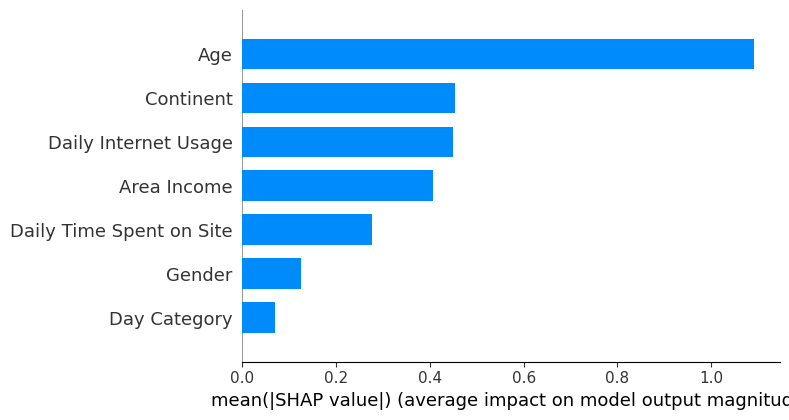

In [ ]:
lgbm_shap_values = shap.TreeExplainer(best_lgbm).shap_values(X_train[:1000])

shap.summary_plot(lgbm_shap_values, X_train[1000:2000], plot_type='bar')

# CONCLUSION & RECOMMENDATION

## Conclusion

1. The most significant factors affecting Click Through Rate (CTR) are Age, Daily Internet Usage, Income, Continent, and Daily Time Spent on Site. Meanwhile, Age and Gender do not have a significant impact on CTR.

2. The LightGBM model demonstrates strong performance with an accuracy of 0.82, an F1 Score of 0.81, Precision of 0.82, Recall of 0.80, and an AUC of 0.82. This indicates that the model is not only effective at classifying data accurately but also maintains a good balance between precision and recall, providing robust overall performance. The high AUC suggests that the model is effective at distinguishing between positive and negative classes..

## Recommendation

**1. Ad Click Distribution:**
Enhance the appeal and relevance of ads to attract more users who have not yet clicked on ads.

**2. Impact of Time Spent on Site:**
Create engaging content and site experiences to encourage users to spend more time on the site, thereby increasing the likelihood of ad clicks.

**3. Daily Internet Usage:**
Target users with lower daily internet usage with more compelling ads, as they tend to be more responsive.

**4. Age Demographics:**
Create ads that target older users with content that is relevant and appealing to them.

**5. Income Demographics:**
Offer promotions or special deals that appeal to users with lower incomes, as they interact with ads more frequently.

**6. Geographic Performance:**
* Tailor ad strategies based on region. Focus more ads in areas with high
click-through rates, such as the Netherlands, and customize content for local markets.
* Review ad frequency in regions with low click-through rates and find ways to improve ad effectiveness. For example, focus on increasing ads in Europe and maintaining high performance in Oceania.